In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Crimes_2001_to_present_sample.csv")

In [3]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
21009,2391987,7562258,HS365952,6/18/2010 9:20,006XX W 61ST ST,460,BATTERY,SIMPLE,APARTMENT,False,...,20.0,68.0,08B,1173040.0,1864439.0,2010,2/4/2016 6:33,41.783448,-87.641118,"(41.783448, -87.641118)"
21010,1363564,1722211,G527671,9/2/2001 17:30,004XX N WABASH AV,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,...,NaN,NaN,6,1176624.0,1903069.0,2001,8/17/2015 15:03,41.889372,-87.626813,"(41.889372, -87.626813)"
21011,5651016,5577053,HN385589,5/22/2007 16:00,051XX N LINCOLN AVE,890,THEFT,FROM BUILDING,APARTMENT,False,...,40.0,4.0,6,1158558.0,1934222.0,2007,4/15/2016 8:55,41.975247,-87.692303,"(41.975247, -87.692303)"
21012,4295051,9339752,HW483719,10/1/2013 20:30,044XX N BROADWAY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,...,46.0,3.0,11,1168469.0,1929861.0,2013,2/4/2016 6:33,41.963071,-87.655984,"(41.963071, -87.655984)"
21013,4355468,9478495,HX131870,1/29/2014 14:35,024XX E 75TH ST,1235,DECEPTIVE PRACTICE,UNLAWFUL USE OF RECORDED SOUND,SIDEWALK,True,...,7.0,43.0,11,1193658.0,1855703.0,2014,2/4/2016 6:33,41.758995,-87.565813,"(41.758995, -87.565813)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21014 entries, 0 to 21013
Data columns (total 23 columns):
Unnamed: 0              21014 non-null int64
ID                      21014 non-null int64
Case Number             21014 non-null object
Date                    21014 non-null object
Block                   21014 non-null object
IUCR                    21014 non-null object
Primary Type            21014 non-null object
Description             21014 non-null object
Location Description    21008 non-null object
Arrest                  21014 non-null bool
Domestic                21014 non-null bool
Beat                    21014 non-null int64
District                21014 non-null int64
Ward                    18979 non-null float64
Community Area          18972 non-null float64
FBI Code                21014 non-null object
X Coordinate            20765 non-null float64
Y Coordinate            20765 non-null float64
Year                    21014 non-null int64
Updated On            

In [5]:
crime_type=data.groupby(['Primary Type'])
crime_type.size()

Primary Type
ARSON                                 34
ASSAULT                             1292
BATTERY                             3818
BURGLARY                            1235
CRIM SEXUAL ASSAULT                   76
CRIMINAL DAMAGE                     2421
CRIMINAL TRESPASS                    596
DECEPTIVE PRACTICE                   807
GAMBLING                              47
HOMICIDE                              27
INTERFERENCE WITH PUBLIC OFFICER      51
INTIMIDATION                          10
KIDNAPPING                            24
LIQUOR LAW VIOLATION                  74
MOTOR VEHICLE THEFT                  965
NARCOTICS                           2348
OBSCENITY                              1
OFFENSE INVOLVING CHILDREN           118
OTHER NARCOTIC VIOLATION               1
OTHER OFFENSE                       1290
PROSTITUTION                         199
PUBLIC PEACE VIOLATION               187
ROBBERY                              730
SEX OFFENSE                           78
STA

In [6]:
#12/4/2014 9:30#crime_type.plot(x='Primary Type',kind='bar')
data['Date']=pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M')

In [7]:
#count of crimes each year
years=[]
for i in data['Date']:
        years.append(i.year)
data['Year'] = years

In [8]:
data.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,2014-12-04 09:30:00,010XX E 47TH ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,2/4/2016 6:33,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,2002-12-24 09:00:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,4/15/2016 8:55,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,2005-03-31 11:46:00,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,4/15/2016 8:55,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,2006-06-30 16:44:00,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,4/15/2016 8:55,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,2006-10-11 23:05:00,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,4/15/2016 8:55,41.871248,-87.744926,"(41.871248, -87.744926)"


In [27]:
arrest= data.groupby(['Year'],as_index=False)['Arrest'].count()
#arrest.columns=['Arrest']
arrest.head()

,Year,Arrest
0,2001,1580
1,2002,1644
2,2003,1566
3,2004,1494
4,2005,1565


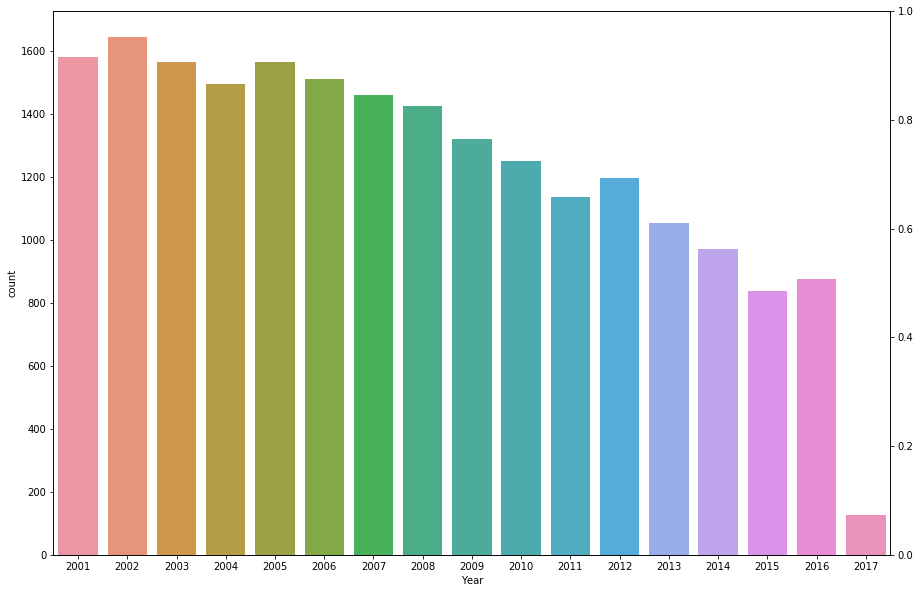

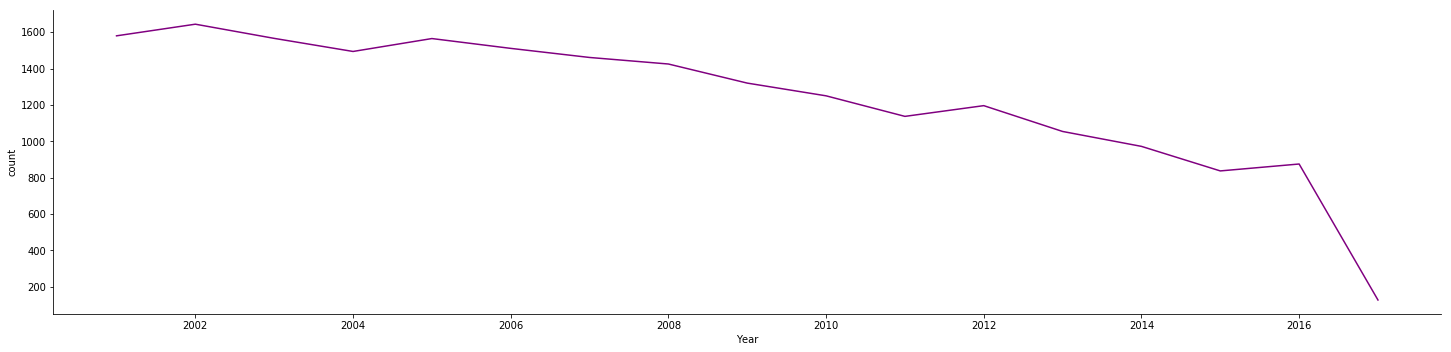

In [50]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax=sns.catplot('Year',kind='count',data=data,aspect=4,ax=ax1)
plt.plot(arrest['Year'],arrest['Arrest'],color='purple')

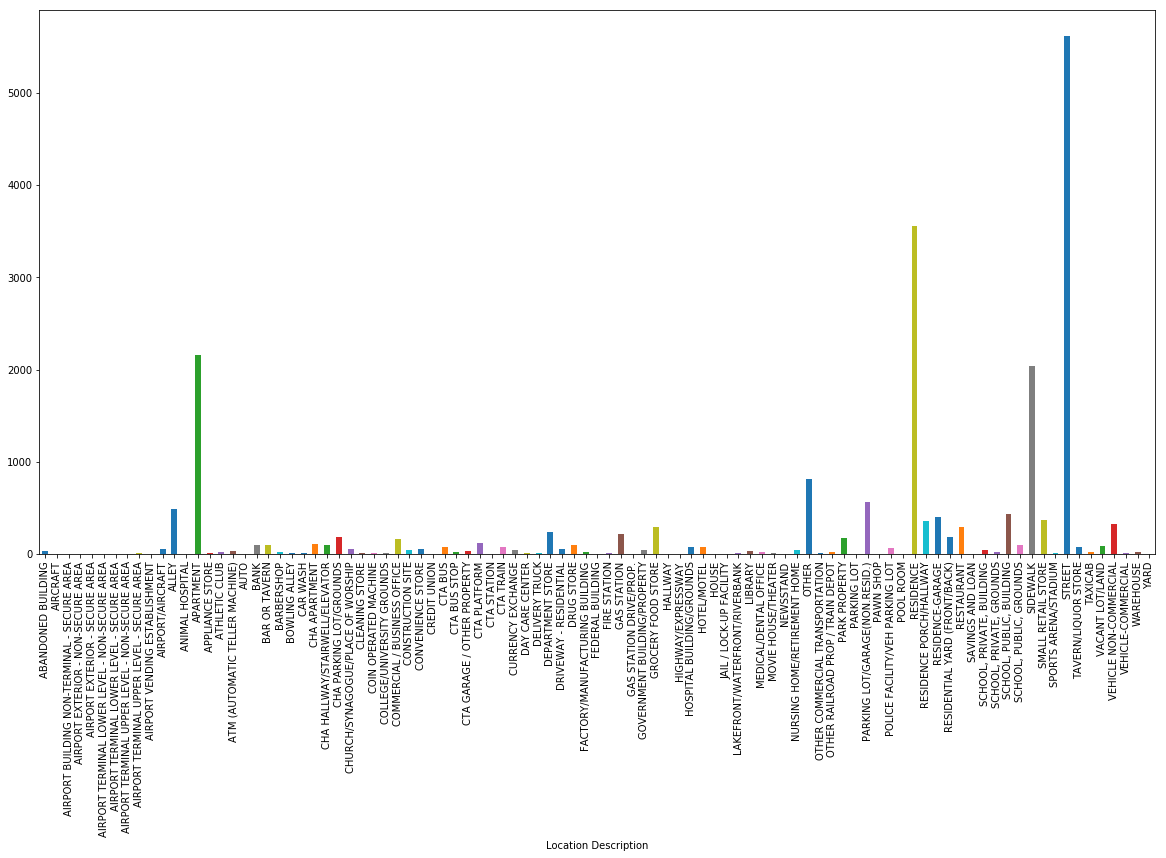

In [12]:
#location vs count
location_crime=data.groupby(['Location Description'])['Case Number'].count()
#location_crime.size
fig = plt.plot(figsize=(15, 10))
location_crime.plot(kind='bar',figsize=(20,10))

In [28]:
data.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/4/2014 9:30,010XX E 47TH ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,0,...,4.0,39.0,04B,1183896.0,1874058.0,2014,2/4/2016 6:33,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 9:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,0,...,29.0,25.0,14,1139530.0,1897135.0,2002,4/15/2016 8:55,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,3/31/2005 11:46,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",1,...,39.0,13.0,15,1152801.0,1933422.0,2005,4/15/2016 8:55,41.973168,-87.713495,"(41.973168, -87.713495)"


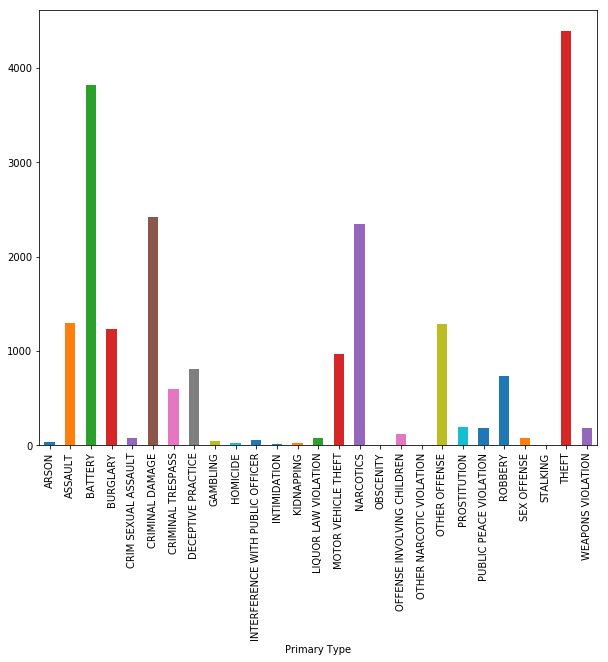

In [97]:
primary_type=data.groupby(['Primary Type'])['Case Number'].count()
primary_type.plot(kind='bar',figsize=(10,8))

In [24]:
data['Location'].unique().size

18358

In [44]:
#What are the most common types of arrests? 


Primary Type
ARSON                                 34
ASSAULT                             1292
BATTERY                             3818
BURGLARY                            1235
CRIM SEXUAL ASSAULT                   76
CRIMINAL DAMAGE                     2421
CRIMINAL TRESPASS                    596
DECEPTIVE PRACTICE                   807
GAMBLING                              47
HOMICIDE                              27
INTERFERENCE WITH PUBLIC OFFICER      51
INTIMIDATION                          10
KIDNAPPING                            24
LIQUOR LAW VIOLATION                  74
MOTOR VEHICLE THEFT                  965
NARCOTICS                           2348
OBSCENITY                              1
OFFENSE INVOLVING CHILDREN           118
OTHER NARCOTIC VIOLATION               1
OTHER OFFENSE                       1290
PROSTITUTION                         199
PUBLIC PEACE VIOLATION               187
ROBBERY                              730
SEX OFFENSE                           78
STA

In [27]:
data['Arrest']=data['Arrest'].map({True:1,False:0})


In [40]:
arrest_type=data[['Case Number','Primary Type','Arrest']]

In [47]:
arrest_type=arrest_type.groupby(['Primary Type']).sum()
arrest_type['Incidents']=data.groupby('Primary Type')['Case Number'].count()
arrest_type['Percentage of Arrest']=(arrest_type['Arrest'] / arrest_type['Incidents'])*100

In [51]:
arrest_type

,Arrest,Incidents,Percentage of Arrest
Primary Type,,,
ARSON,3,34,8.823529
ASSAULT,316,1292,24.458204
BATTERY,911,3818,23.860660
BURGLARY,85,1235,6.882591
CRIM SEXUAL ASSAULT,6,76,7.894737
CRIMINAL DAMAGE,196,2421,8.095828
CRIMINAL TRESPASS,447,596,75.000000
DECEPTIVE PRACTICE,153,807,18.959108
GAMBLING,47,47,100.000000


In [54]:
#Now that we know the most common types of incidents and arrests, how have these been trending over the previous years?

In [106]:
type_years=data[['Case Number','Primary Type','Year']]
type_years=type_years.groupby(['Year','Primary Type'],as_index=False).count()
type_years.sort_values(['Case Number'],inplace=True,ascending=False)
type_years=type_years.loc[:12,]

TypeError: incompatible index of inserted column with frame index

In [105]:
type_years.head(3)

,Year,Primary Type,Case Number,Arrest
91,2004,THEFT,338,NaN
67,2003,THEFT,333,NaN
25,2002,BATTERY,324,NaN


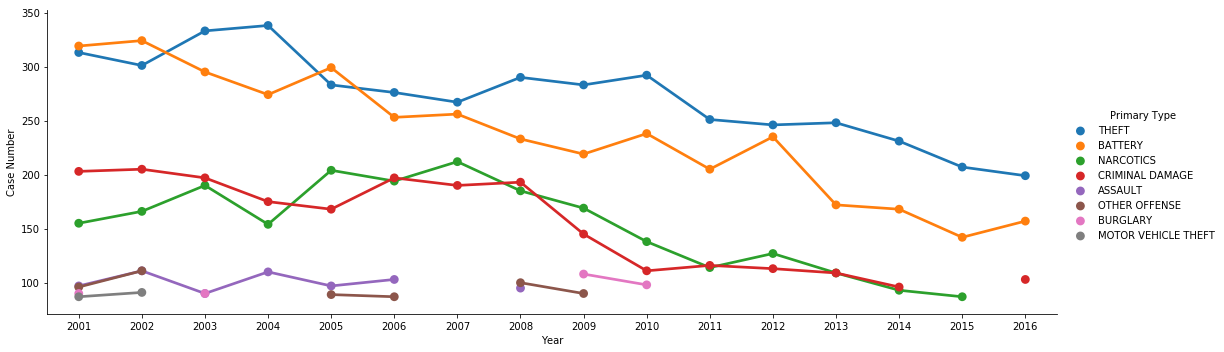

In [102]:
sns.catplot('Year','Case Number',data=type_years,hue='Primary Type',kind='point',aspect=3)